In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

import convert_time as ct

In [2]:
dtf = pd.read_csv("benchmark_ngsrg_mgi_lite.csv", sep=",")
dtf = dtf.dropna()

In [3]:
dtf

,Run,TypeRun,LenRead,Time,Memory,MemoryRun,#Barcode
0,2,PE,100,02:15:11,782.0,302.0,27.0
1,3,PE,150,01:03:37,387.0,153.0,12.0
3,5,PE,200,04:19:14,1300.0,565.0,30.0
4,6,SR,400,03:41:25,1200.0,582.0,32.0
5,11,PE,100,02:06:16,876.0,288.0,31.0


# Prédiction du temps du pipepeline NGSRG MGI
prédiction du temps que va mettre le pipeline NGSRG MGI à partir de 4 variables (le type de run (PE, SE), la longueur des reads, le nombre de barcodes attendus et la taille du répertoire de run.

In [4]:
list_type_run = []
for type_run in dtf["TypeRun"]:
    if type_run == "PE":
        list_type_run.append(2)
    else:
        list_type_run.append(1)

list_time = [time.split(":") for time in dtf["Time"]]
list_time = [ct.convert_time2(int(time[2]), int(time[1]), int(time[0]), 0, "h") for time in list_time]

In [5]:
array_var = [np.array(list_type_run),  np.array(dtf["LenRead"]), np.array(dtf["#Barcode"]), np.array(dtf["MemoryRun"])]

In [6]:
array_var = np.array(array_var).T

In [7]:
np.linalg.lstsq(array_var, list_time, rcond=None)

(array([ 0.16655549, -0.00283176, -0.01779989,  0.00900192]),
 array([0.00141117]),
 4,
 array([1038.58076328,  151.21526722,   16.20851413,    1.4917043 ]))

In [8]:
a, b, c, d = np.linalg.lstsq(array_var, list_time, rcond=None)[0]
a, b, c, d

(0.166555486924637,
 -0.0028317564807529244,
 -0.017799892164072312,
 0.009001916052716216)

In [9]:
time_pred = np.array(list_type_run) * a +  np.array(dtf["LenRead"]) * b +  \
            np.array(dtf["#Barcode"]) * c + (np.array(dtf["MemoryRun"])) * d

In [10]:
time_pred

array([2.28791689, 1.07204195, 4.31884548, 3.70337149, 2.09069049])

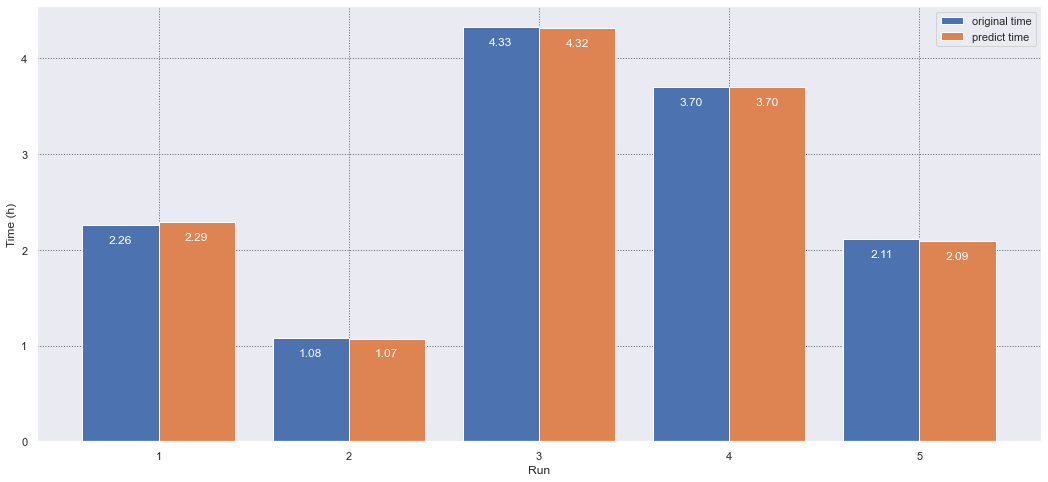

In [11]:
sns.set_theme(style="darkgrid")
sns.set_style({"grid.color": ".4", "grid.linestyle": ":"})
plt.figure(figsize=(18, 8))
bar1 = plt.bar(list(range(1,6)),list_time, label="original time",  align="edge", width=-0.4)
plt.bar_label(bar1, padding=-20, fmt="%.2f", color="white")
bar2 = plt.bar(list(range(1,6)), time_pred, label="predict time",  align="edge", width=0.4)
plt.bar_label(bar2, padding=-20, fmt="%.2f", color="white")
plt.xlabel("Run")
plt.ylabel("Time (h)")
plt.legend();

## Prédiction de la mémoire utilisé pour le run run 12 (flowcell "V350062820")

In [12]:
2 * a +  100 * b +  27 * c + 293 * d

2.20689964078988

# Prédiction de la mémoire utilisé par le pipepeline NGSRG MGI dans le répertoire RG_IN_PROCESS
prédiction de la mémoire que le pipeline NGSRG MGI va utilisé pour le run dans le répertoire RG8IN8PROCESS à partir de 4 variables (le type de run (PE, SE), la longueur des reads, le nombre de barcodes attendus et la taille du répertoire de run.

In [13]:
list_memory = np.array(dtf["Memory"])

In [14]:
array_var = [np.array(list_type_run),  np.array(dtf["LenRead"]), np.array(dtf["#Barcode"]), np.array(dtf["MemoryRun"])]

In [15]:
array_var = np.array(array_var).T

In [16]:
np.linalg.lstsq(array_var, list_memory, rcond=None)

(array([30.16593998, -0.52404267,  9.97501597,  1.82896789]),
 array([3487.89386775]),
 4,
 array([1038.58076328,  151.21526722,   16.20851413,    1.4917043 ]))

In [17]:
a, b, c, d = np.linalg.lstsq(array_var, list_memory, rcond=None)[0]
a, b, c, d

(30.165939977709485,
 -0.5240426735684072,
 9.975015966462966,
 1.8289678944690886)

In [18]:
memory_pred = np.array(list_type_run) * a +  np.array(dtf["LenRead"]) * b +  \
              np.array(dtf["#Barcode"]) * c + (np.array(dtf["MemoryRun"])) * d

In [19]:
memory_pred

array([ 829.60134782,  381.25775837, 1288.14068461, 1204.20869606,
        843.89586117])

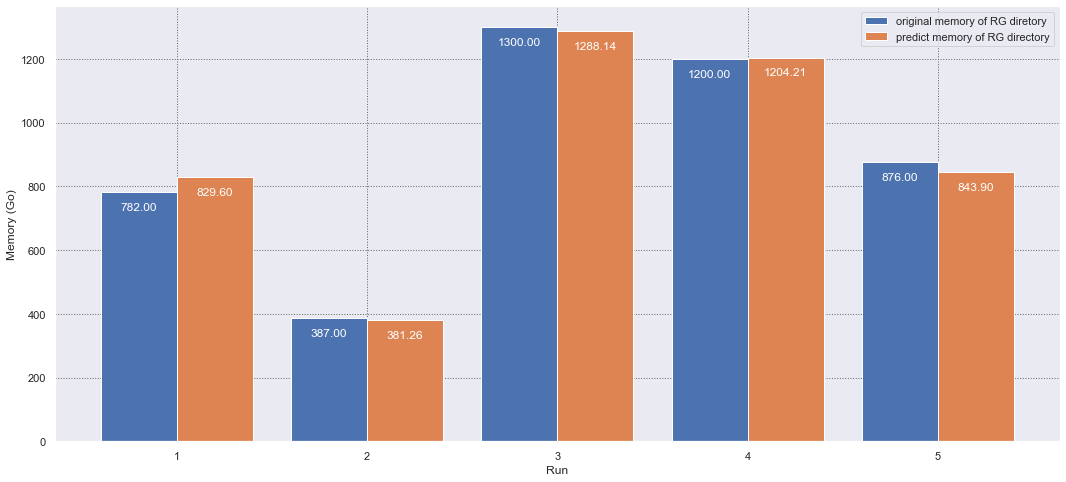

In [20]:
plt.figure(figsize=(18, 8))
bar1 = plt.bar(list(range(1,6)),list_memory, label="original memory of RG diretory",  align="edge", width=-0.4)
plt.bar_label(bar1, padding=-20, fmt="%.2f", color="white")
bar2 = plt.bar(list(range(1,6)), memory_pred, label="predict memory of RG directory",  align="edge", width=0.4)
plt.bar_label(bar2, padding=-20, fmt="%.2f", color="white")
plt.xlabel("Run")
plt.ylabel("Memory (Go)")
plt.legend();

## Prédiction de la mémoire utilisé pour le run run 12 (flowcell "V350062820")

In [22]:
2 * a +  100 * b +  27 * c + 293 * d

813.1406367725212